# Foreign Demand Shock

In [8]:
%load_ext autoreload
%autoreload 2

import time
import pickle
import numpy as np
from scipy import optimize

import matplotlib.pyplot as plt   
plt.style.use('seaborn-whitegrid')
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

from BabyMAKROModel import BabyMAKROModelClass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Setup

In [9]:
model = BabyMAKROModelClass(name='Extended') # create an instance of the model

In [10]:
par = model.par
ss = model.ss
sol = model.sol

# Find steady state

In [11]:
model.find_ss(do_print=True)

Labor supply and search and matching:
ss.S = 4.24,  ss.L = 57.88,  ss.delta_L = 0.04,  ss.v = 9.41,  ss.m_v = 0.23
Capital agency FOC:
ss.r_K = 0.14
Production firm pricing:
ss.r_ell = 2.71
Labor agency:
ss.ell = 57.51,  ss.W = 2.68
Government:
ss.B_G = 100.00,  ss.G = 61.82,  ss.tau = 0.42
Households:
solving for household behavior: result.converged = True
ss.C = 98.26,  ss.B = 215.09
Production firm FOCs:
ss.K = 573.77
Capital accumulation equation:
ss.I = 57.38
Output in production firm:
ss.Y = 236.29
Market clearing:
ss.C_Y = 68.78,  ss.G_Y = 55.64,  ss.I_Y = 37.29,  ss.X_Y = 74.57
[ ss.C_M = 29.48,  ss.G_M = 6.18,  ss.I_M = 20.08,  ss.X_M = 49.72 ] = ss.M = 105.46
ss.X = 124.29
Bargaining:
par.phi = 0.981


# Find an impulse-response

**Calculate Jacobian:**

In [12]:
model.calc_jac(do_print=True)

Jacobian calculated in 33.9 secs secs


**Set exogenous variables:**

In [13]:
model.set_exo_ss()

**Introduce Shock**

In [14]:
Tshock = 50
shock = 0.01*ss.chi
persistence = 0.8**np.arange(Tshock)
sol.chi[:Tshock] = ss.chi + shock*persistence

Tshock = 50
shock = 0.03*ss.P_F
persistence = 0.80**np.arange(Tshock)
sol.P_F[:Tshock] = ss.P_F + shock*persistence

**Find IRF:**

In [15]:
model.find_IRF()

initial:
   max. abs. error = 2.08e+00
    0.00e+00 in bargaining_cond
    3.75e-13 in Bq_match
    3.33e-16 in FOC_capital_agency
    2.49e-14 in FOC_K_ell
    2.08e+00 in mkt_clearing

it = 0
 solve: t1-t0 = 0.1 secs
   max. abs. error = 2.08e+00
    2.66e-04 in bargaining_cond
    3.05e-02 in Bq_match
    1.94e-04 in FOC_capital_agency
    6.89e-03 in FOC_K_ell
    8.98e-02 in mkt_clearing
 evaluate: t1-t0 = 0.0 secs
 update_jac: t1-t0 = 0.0 secs

it = 1
 solve: t1-t0 = 0.1 secs
   max. abs. error = 8.98e-02
    4.13e-05 in bargaining_cond
    1.62e-03 in Bq_match
    3.72e-05 in FOC_capital_agency
    1.00e-03 in FOC_K_ell
    1.17e-02 in mkt_clearing
 evaluate: t1-t0 = 0.0 secs
 update_jac: t1-t0 = 0.0 secs

it = 2
 solve: t1-t0 = 0.1 secs
   max. abs. error = 1.17e-02
    7.09e-06 in bargaining_cond
    3.58e-04 in Bq_match
    6.50e-06 in FOC_capital_agency
    1.70e-04 in FOC_K_ell
    1.97e-03 in mkt_clearing
 evaluate: t1-t0 = 0.0 secs
 update_jac: t1-t0 = 0.0 secs

it = 3
 s

# Impulse Response Figures

## Longview - To Check Convergence

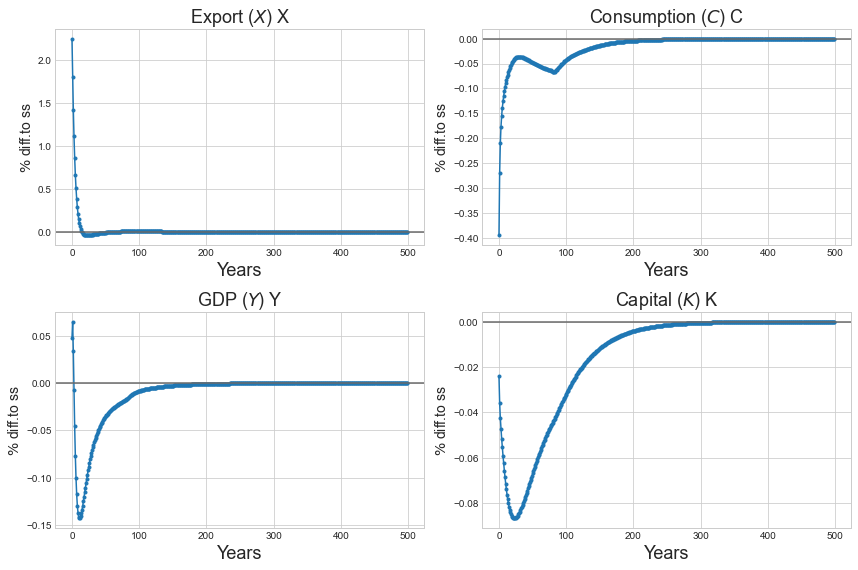

In [16]:
model.plot_IRF(varlist=['X','C','Y','K'],T_IRF=par.T,ncol=2)

## National accouting - Quantities

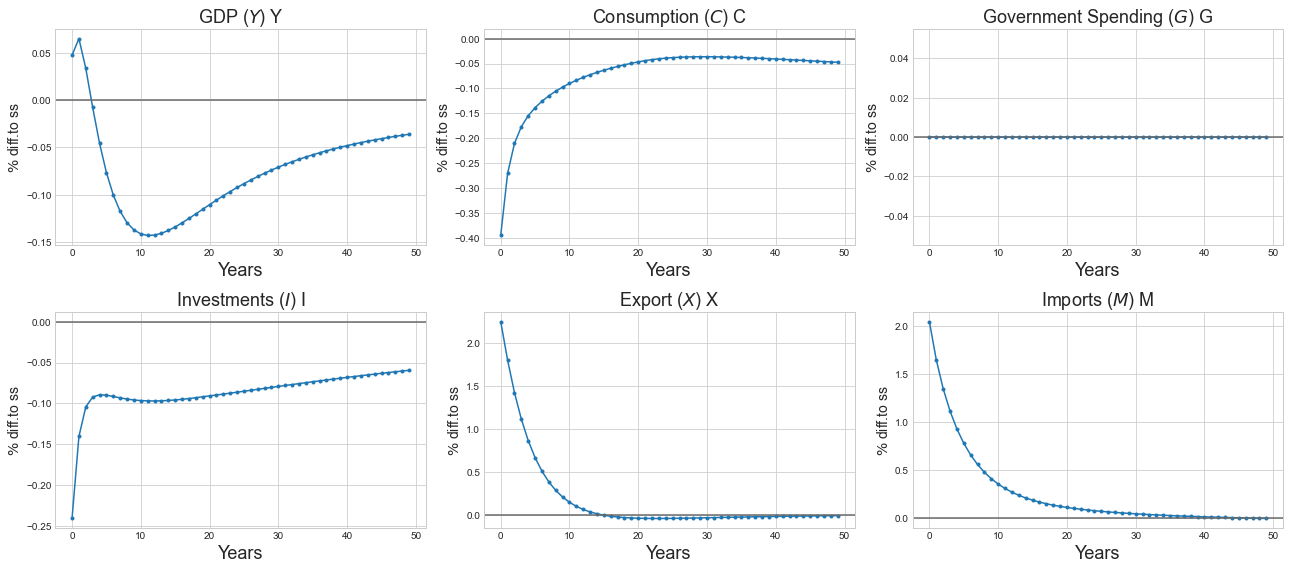

In [17]:
model.plot_IRF(varlist=['Y','C','G','I','X','M'])

## National Accouting - Prices

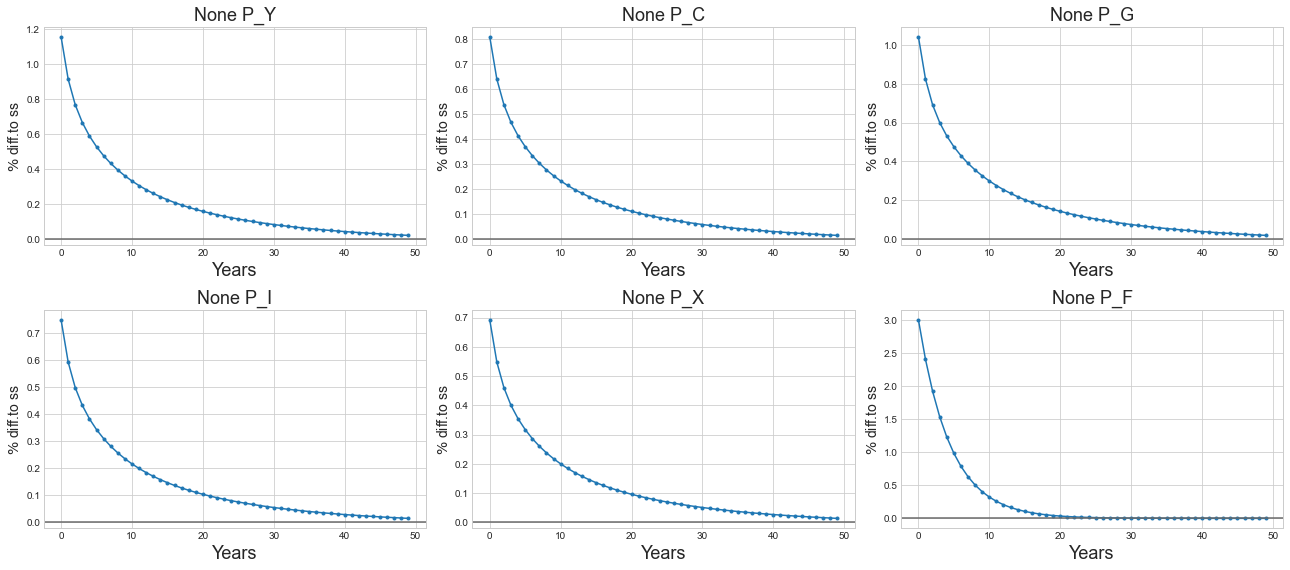

In [18]:
model.plot_IRF(varlist=['P_Y','P_C','P_G','P_I','P_X','P_F'])

## Labor market

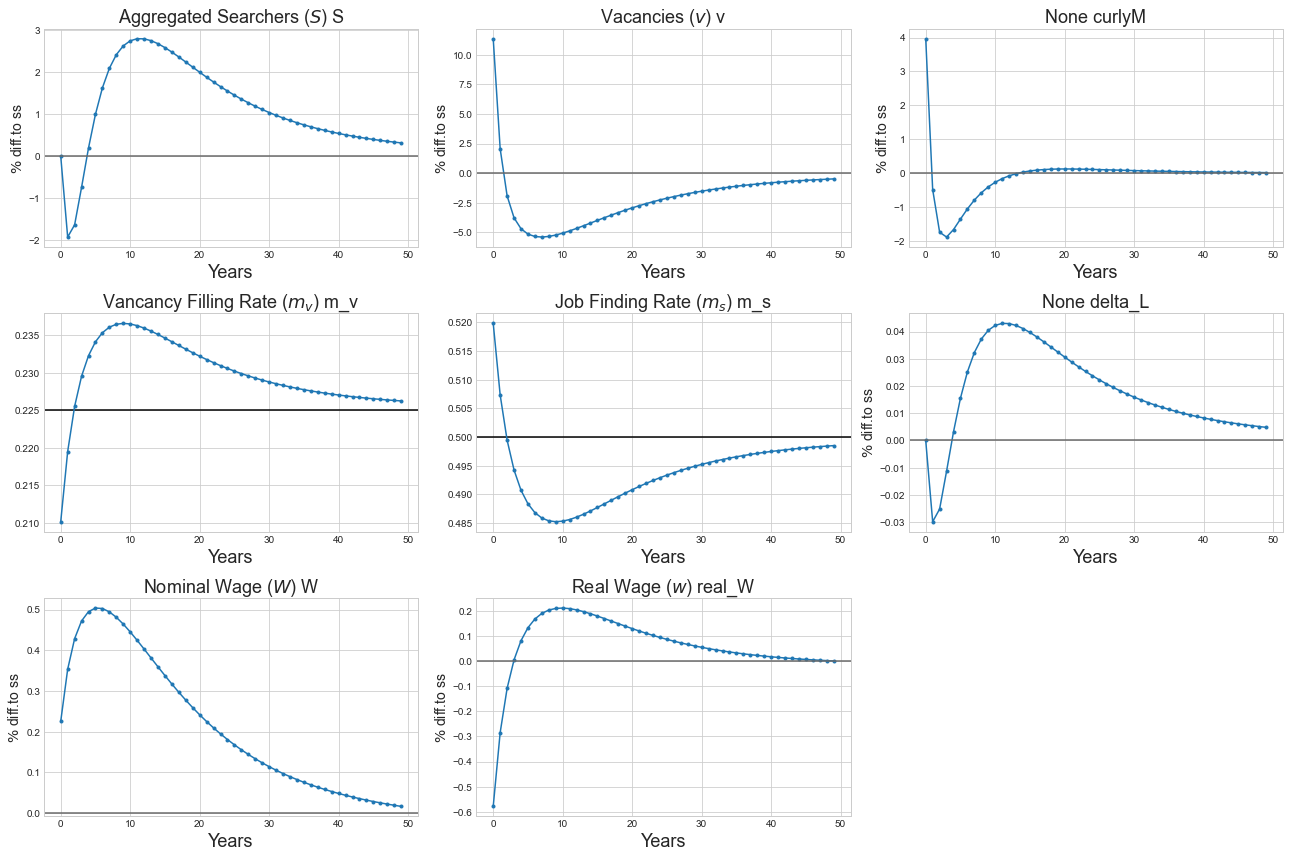

In [19]:
model.plot_IRF(varlist=['S','v','curlyM','m_v','m_s','delta_L','W','real_W'],abs=['m_v','m_s'])

## Capital accumulation

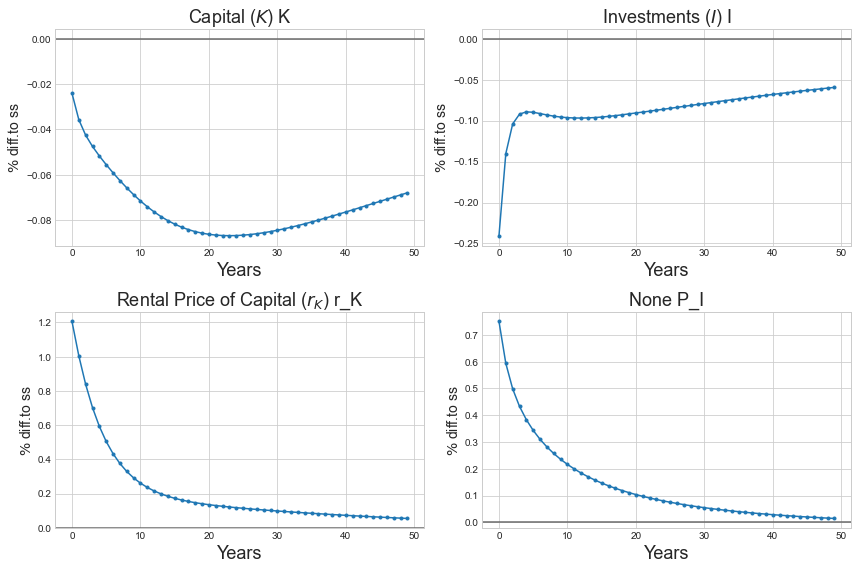

In [20]:
model.plot_IRF(varlist=['K','I','r_K','P_I'],ncol=2)

## Production firms

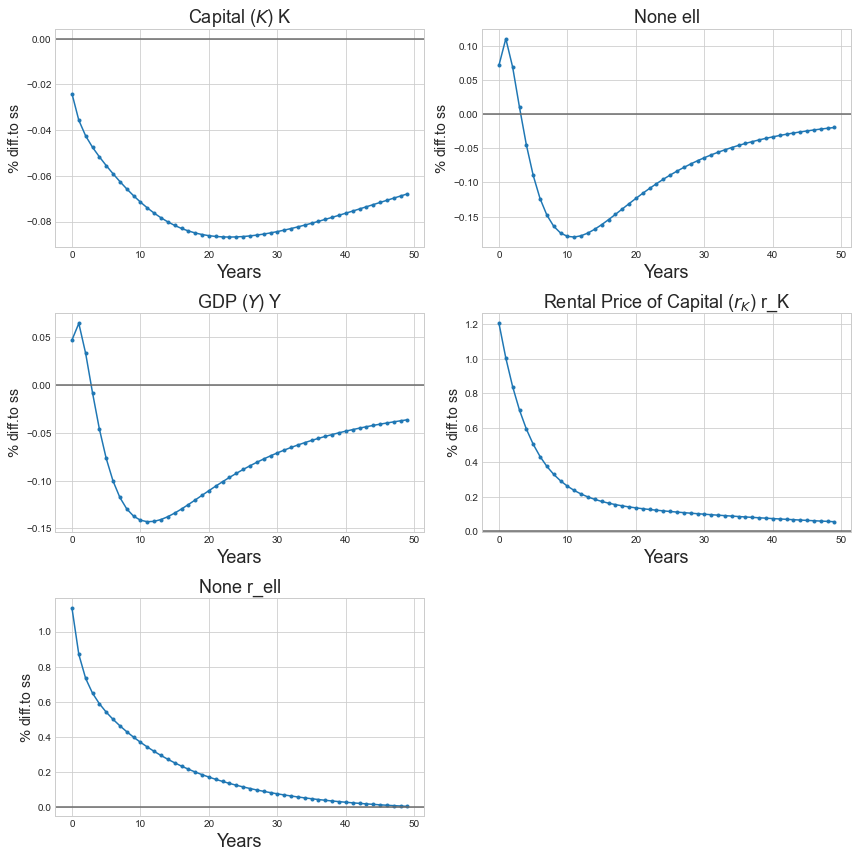

In [21]:
model.plot_IRF(varlist=['K','ell','Y','r_K','r_ell'],ncol=2)

## Government

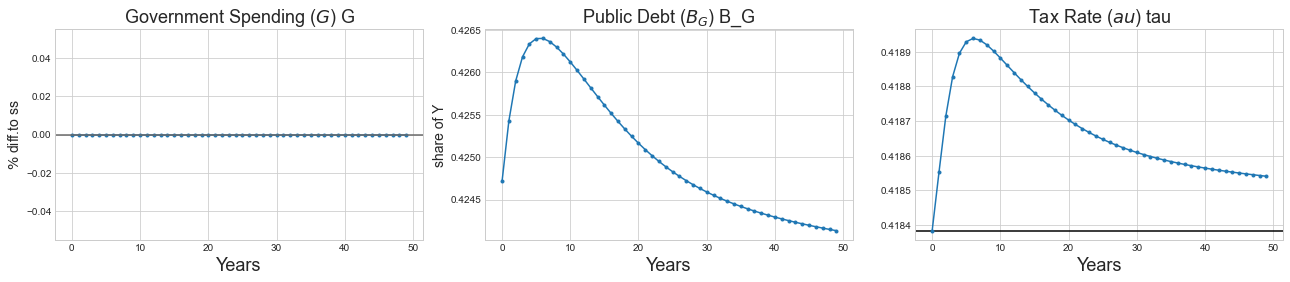

In [22]:
model.plot_IRF(varlist=['G','B_G','tau'],abs=['tau'],Y_share=['B_G'])

## Households - aggregate

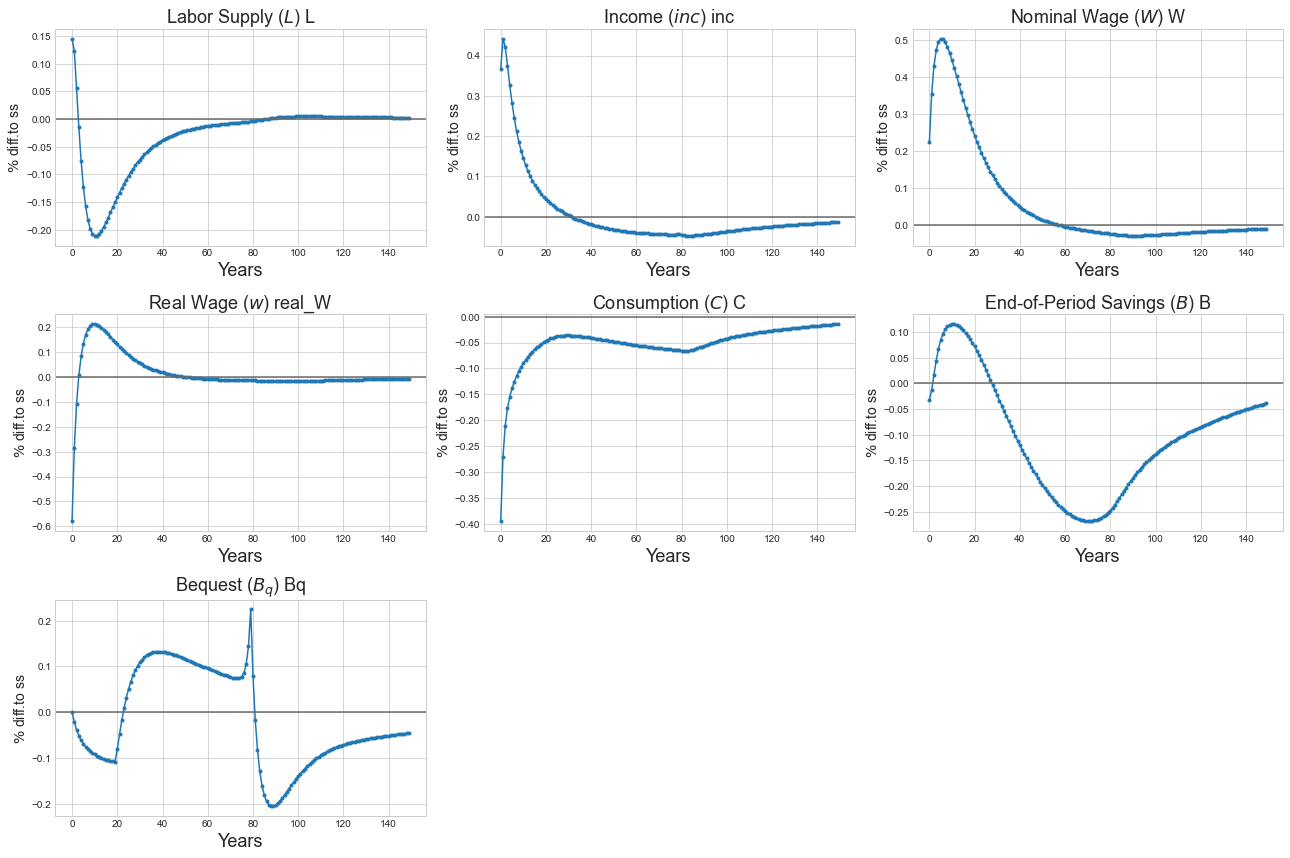

In [23]:
model.plot_IRF(varlist=['L','inc','W','real_W','C','B','Bq'],ncol=3, T_IRF = 150)

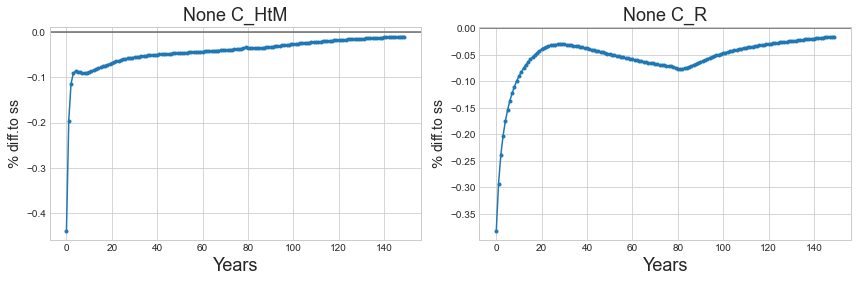

In [24]:
model.plot_IRF(varlist=['C_HtM','C_R'],ncol=2, T_IRF = 150)

## Households - life-cycle

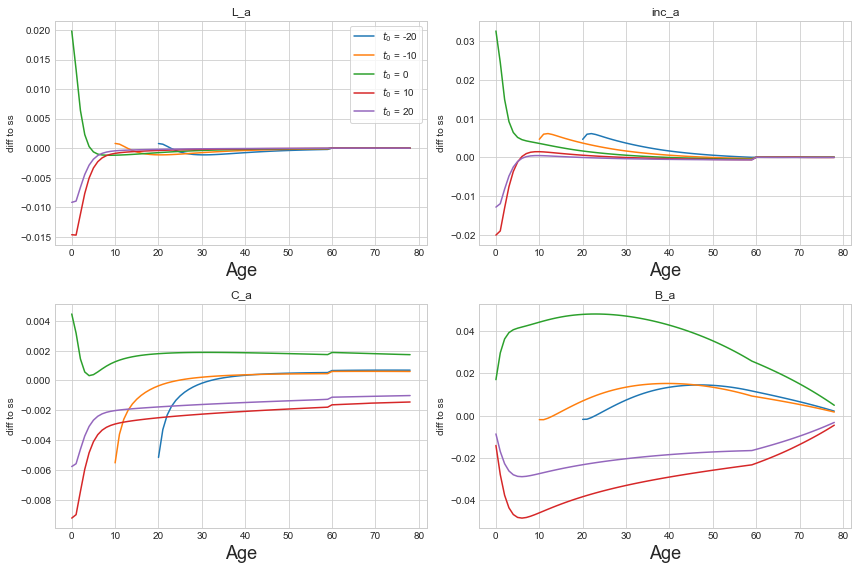

In [25]:
model.plot_IRF_hh(varlist=['L_a','inc_a','C_a','B_a'],t0_list=[-20,-10,0,10,20])

# Sensitivity Analysis

## Change in HtM-share

In [26]:
model = BabyMAKROModelClass(name='Extended') # create an instance of the model
par = model.par
ss = model.ss
sol = model.sol
model1 = model.copy()
model2 = model.copy()
model3 = model.copy()

In [27]:
Models = [model, model1, model2, model3] #Create list of the models
Lambdas = [0.0, 0.1, 0.25, 0.4] #Create list of Lambda values
    
for i in range(len(Models)):
    Models[i].par.Lambda = Lambdas[i]
    Models[i].find_ss()
    Models[i].calc_jac()
    Gshock = 50
    shock_chi = 0.01*Models[i].ss.chi
    persistence_chi = 0.8**np.arange(Tshock)
    Models[i].sol.chi[:Tshock] = Models[i].ss.chi + shock_chi*persistence_chi
    shock_p_f = 0.03*ss.P_F
    persistence_p_f = 0.80**np.arange(Tshock)
    Models[i].sol.P_F[:Tshock] = ss.P_F + shock_p_f*persistence_p_f
    Models[i].find_IRF()

initial:
   max. abs. error = 2.03e+00
    0.00e+00 in bargaining_cond
    3.00e-13 in Bq_match
    3.33e-16 in FOC_capital_agency
    2.49e-14 in FOC_K_ell
    2.03e+00 in mkt_clearing

it = 0
 solve: t1-t0 = 0.1 secs
   max. abs. error = 2.03e+00
    2.52e-04 in bargaining_cond
    3.76e-02 in Bq_match
    1.86e-04 in FOC_capital_agency
    6.53e-03 in FOC_K_ell
    8.29e-02 in mkt_clearing
 evaluate: t1-t0 = 0.0 secs
 update_jac: t1-t0 = 0.0 secs

it = 1
 solve: t1-t0 = 0.2 secs
   max. abs. error = 8.29e-02
    3.81e-05 in bargaining_cond
    2.02e-03 in Bq_match
    3.45e-05 in FOC_capital_agency
    9.25e-04 in FOC_K_ell
    1.04e-02 in mkt_clearing
 evaluate: t1-t0 = 0.0 secs
 update_jac: t1-t0 = 0.0 secs

it = 2
 solve: t1-t0 = 0.1 secs
   max. abs. error = 1.04e-02
    6.05e-06 in bargaining_cond
    4.05e-04 in Bq_match
    5.58e-06 in FOC_capital_agency
    1.45e-04 in FOC_K_ell
    1.63e-03 in mkt_clearing
 evaluate: t1-t0 = 0.0 secs
 update_jac: t1-t0 = 0.0 secs

it = 3
 s

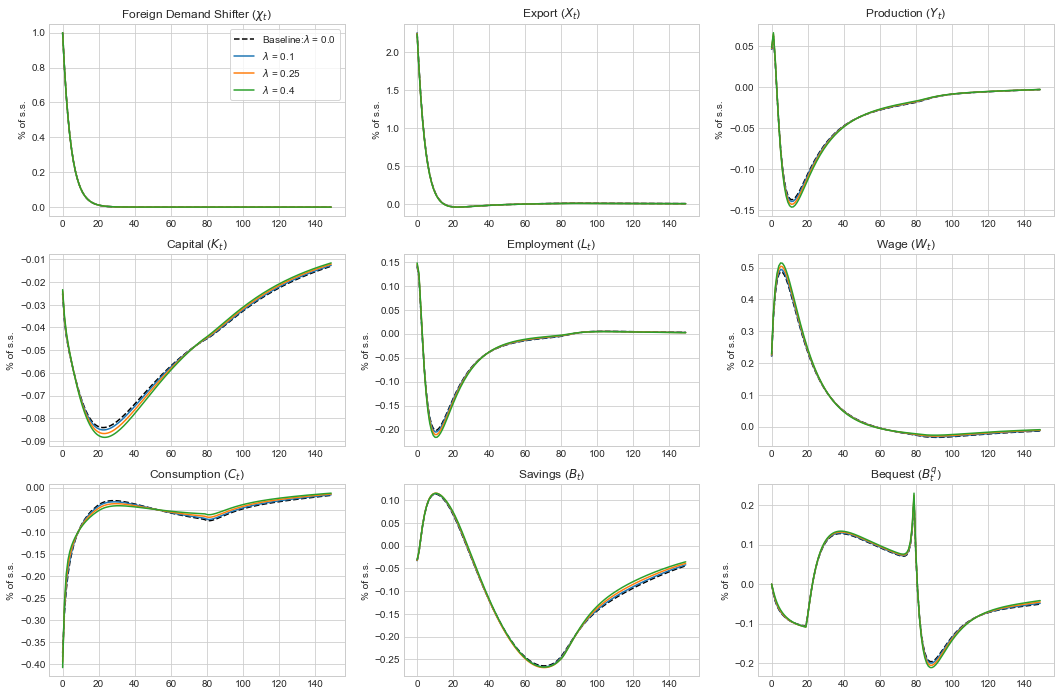

In [28]:
T_IRF = 150

fig = plt.figure(figsize=(3*6,3*6/1.5))

ax = fig.add_subplot(3,3,1)
ax.plot((Models[0].sol.chi[:T_IRF]/Models[0].ss.chi-1)*100,label=f'Baseline:$\lambda$ = {Models[0].par.Lambda}', color = 'k', linestyle = '--')
ax.plot((Models[1].sol.chi[:T_IRF]/Models[1].ss.chi-1)*100,label=f'$\lambda$ = {Models[1].par.Lambda}')
ax.plot((Models[2].sol.chi[:T_IRF]/Models[2].ss.chi-1)*100,label=f'$\lambda$ = {Models[2].par.Lambda}')
ax.plot((Models[3].sol.chi[:T_IRF]/Models[3].ss.chi-1)*100,label=f'$\lambda$ = {Models[3].par.Lambda}')
ax.set_ylabel('% of s.s.')
ax.set_title('Foreign Demand Shifter ($\chi_t$)')
ax.legend(frameon=True)

ax = fig.add_subplot(3,3,2)
ax.plot((Models[0].sol.X[:T_IRF]/Models[0].ss.X-1)*100,label=f'Baseline:$\lambda$ = {Models[0].par.Lambda}', color = 'k', linestyle = '--')
ax.plot((Models[1].sol.X[:T_IRF]/Models[1].ss.X-1)*100,label=f'$\lambda$ = {Models[1].par.Lambda}')
ax.plot((Models[2].sol.X[:T_IRF]/Models[2].ss.X-1)*100,label=f'$\lambda$ = {Models[2].par.Lambda}')
ax.plot((Models[3].sol.X[:T_IRF]/Models[3].ss.X-1)*100,label=f'$\lambda$ = {Models[3].par.Lambda}')
ax.set_ylabel('% of s.s.')
ax.set_title('Export ($X_t$)')

ax = fig.add_subplot(3,3,3)
ax.plot((Models[0].sol.Y[:T_IRF]/Models[0].ss.Y-1)*100,label=f'Baseline:$\lambda$ = {Models[0].par.Lambda}', color = 'k', linestyle = '--')
ax.plot((Models[1].sol.Y[:T_IRF]/Models[1].ss.Y-1)*100,label=f'$\lambda$ = {Models[1].par.Lambda}')
ax.plot((Models[2].sol.Y[:T_IRF]/Models[2].ss.Y-1)*100,label=f'$\lambda$ = {Models[2].par.Lambda}')
ax.plot((Models[3].sol.Y[:T_IRF]/Models[3].ss.Y-1)*100,label=f'$\lambda$ = {Models[3].par.Lambda}')
ax.set_ylabel('% of s.s.')
ax.set_title('Production ($Y_t$)')

ax = fig.add_subplot(3,3,4)
ax.plot((Models[0].sol.K[:T_IRF]/Models[0].ss.K-1)*100,label=f'Baseline:$\lambda$ = {Models[0].par.Lambda}', color = 'k', linestyle = '--')
ax.plot((Models[1].sol.K[:T_IRF]/Models[1].ss.K-1)*100,label=f'$\lambda$ = {Models[1].par.Lambda}')
ax.plot((Models[2].sol.K[:T_IRF]/Models[2].ss.K-1)*100,label=f'$\lambda$ = {Models[2].par.Lambda}')
ax.plot((Models[3].sol.K[:T_IRF]/Models[3].ss.K-1)*100,label=f'$\lambda$ = {Models[3].par.Lambda}')
ax.set_ylabel('% of s.s.')
ax.set_title('Capital ($K_t$)')

ax = fig.add_subplot(3,3,5)
ax.plot((Models[0].sol.L[:T_IRF]/Models[0].ss.L-1)*100,label=f'Baseline:$\lambda$ = {Models[0].par.Lambda}', color = 'k', linestyle = '--')
ax.plot((Models[1].sol.L[:T_IRF]/Models[1].ss.L-1)*100,label=f'$\lambda$ = {Models[1].par.Lambda}')
ax.plot((Models[2].sol.L[:T_IRF]/Models[2].ss.L-1)*100,label=f'$\lambda$ = {Models[2].par.Lambda}')
ax.plot((Models[3].sol.L[:T_IRF]/Models[3].ss.L-1)*100,label=f'$\lambda$ = {Models[3].par.Lambda}')
ax.set_ylabel('% of s.s.')
ax.set_title('Employment ($L_t$)')

ax = fig.add_subplot(3,3,6)
ax.plot((Models[0].sol.W[:T_IRF]/Models[0].ss.W-1)*100,label=f'Baseline:$\lambda$ = {Models[0].par.Lambda}', color = 'k', linestyle = '--')
ax.plot((Models[1].sol.W[:T_IRF]/Models[1].ss.W-1)*100,label=f'$\lambda$ = {Models[1].par.Lambda}')
ax.plot((Models[2].sol.W[:T_IRF]/Models[2].ss.W-1)*100,label=f'$\lambda$ = {Models[2].par.Lambda}')
ax.plot((Models[3].sol.W[:T_IRF]/Models[3].ss.W-1)*100,label=f'$\lambda$ = {Models[3].par.Lambda}')
ax.set_ylabel('% of s.s.')
ax.set_title('Wage ($W_{t}$)')

ax = fig.add_subplot(3,3,7)
ax.plot((Models[0].sol.C[:T_IRF]/Models[0].ss.C-1)*100,label=f'Baseline:$\lambda$ = {Models[0].par.Lambda}', color = 'k', linestyle = '--')
ax.plot((Models[1].sol.C[:T_IRF]/Models[1].ss.C-1)*100,label=f'$\lambda$ = {Models[1].par.Lambda}')
ax.plot((Models[2].sol.C[:T_IRF]/Models[2].ss.C-1)*100,label=f'$\lambda$ = {Models[2].par.Lambda}')
ax.plot((Models[3].sol.C[:T_IRF]/Models[3].ss.C-1)*100,label=f'$\lambda$ = {Models[3].par.Lambda}')
ax.set_ylabel('% of s.s.')
ax.set_title('Consumption ($C_{t}$)')

ax = fig.add_subplot(3,3,8)
ax.plot((Models[0].sol.B[:T_IRF]/Models[0].ss.B-1)*100,label=f'Baseline:$\lambda$ = {Models[0].par.Lambda}', color = 'k', linestyle = '--')
ax.plot((Models[1].sol.B[:T_IRF]/Models[1].ss.B-1)*100,label=f'$\lambda$ = {Models[1].par.Lambda}')
ax.plot((Models[2].sol.B[:T_IRF]/Models[2].ss.B-1)*100,label=f'$\lambda$ = {Models[2].par.Lambda}')
ax.plot((Models[3].sol.B[:T_IRF]/Models[3].ss.B-1)*100,label=f'$\lambda$ = {Models[3].par.Lambda}')
ax.set_ylabel('% of s.s.')
ax.set_title('Savings ($B_{t}$)')

ax = fig.add_subplot(3,3,9)
ax.plot((Models[0].sol.Bq[:T_IRF]/Models[0].ss.Bq-1)*100,label=f'Baseline:$\lambda$ = {Models[0].par.Lambda}', color = 'k', linestyle = '--')
ax.plot((Models[1].sol.Bq[:T_IRF]/Models[1].ss.Bq-1)*100,label=f'$\lambda$ = {Models[1].par.Lambda}')
ax.plot((Models[2].sol.Bq[:T_IRF]/Models[2].ss.Bq-1)*100,label=f'$\lambda$ = {Models[2].par.Lambda}')
ax.plot((Models[3].sol.Bq[:T_IRF]/Models[3].ss.Bq-1)*100,label=f'$\lambda$ = {Models[3].par.Lambda}')
ax.set_ylabel('% of s.s.')
ax.set_title('Bequest ($B^{q}_{t}$)');

## Change in Export Rigidity

In [29]:
model = BabyMAKROModelClass(name='Extended') # create an instance of the model
par = model.par
ss = model.ss
sol = model.sol
model1 = model.copy()
model2 = model.copy()
model3 = model.copy()

In [30]:
Models = [model, model1, model2, model3] #Create list of the models
Lambdas_X = [0.0, 0.3, 0.5, 0.8] #Create list of Lambda values, 0.8 er jf. MAKRO documentation med Export 
    
for i in range(len(Models)):
    Models[i].par.lambda_X = Lambdas_X[i]
    Models[i].find_ss()
    Models[i].calc_jac()
    Gshock = 50
    shock_chi = 0.01*Models[i].ss.chi
    persistence_chi = 0.8**np.arange(Tshock)
    Models[i].sol.chi[:Tshock] = Models[i].ss.chi + shock_chi*persistence_chi
    shock_p_f = 0.03*ss.P_F
    persistence_p_f = 0.80**np.arange(Tshock)
    Models[i].sol.P_F[:Tshock] = ss.P_F + shock_p_f*persistence_p_f
    Models[i].find_IRF()

initial:
   max. abs. error = 4.16e+00
    0.00e+00 in bargaining_cond
    3.75e-13 in Bq_match
    3.33e-16 in FOC_capital_agency
    2.49e-14 in FOC_K_ell
    4.16e+00 in mkt_clearing

it = 0
 solve: t1-t0 = 0.1 secs
   max. abs. error = 4.16e+00
    7.59e-04 in bargaining_cond
    9.36e-02 in Bq_match
    5.89e-04 in FOC_capital_agency
    1.97e-02 in FOC_K_ell
    2.99e-01 in mkt_clearing
 evaluate: t1-t0 = 0.0 secs
 update_jac: t1-t0 = 0.0 secs

it = 1
 solve: t1-t0 = 0.1 secs
   max. abs. error = 2.99e-01
    1.97e-04 in bargaining_cond
    7.16e-03 in Bq_match
    1.88e-04 in FOC_capital_agency
    4.77e-03 in FOC_K_ell
    6.57e-02 in mkt_clearing
 evaluate: t1-t0 = 0.0 secs
 update_jac: t1-t0 = 0.0 secs

it = 2
 solve: t1-t0 = 0.1 secs
   max. abs. error = 6.57e-02
    6.34e-05 in bargaining_cond
    2.83e-03 in Bq_match
    6.03e-05 in FOC_capital_agency
    1.51e-03 in FOC_K_ell
    2.08e-02 in mkt_clearing
 evaluate: t1-t0 = 0.0 secs
 update_jac: t1-t0 = 0.0 secs

it = 3
 s

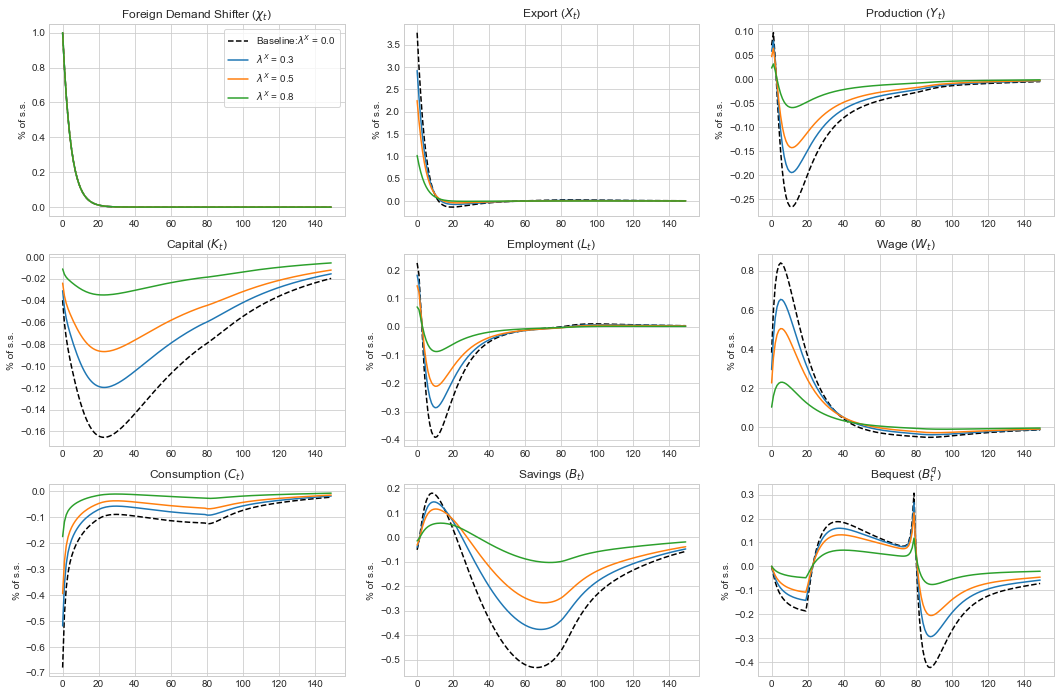

In [31]:
T_IRF = 150

fig = plt.figure(figsize=(3*6,3*6/1.5))

ax = fig.add_subplot(3,3,1)
ax.plot((Models[0].sol.chi[:T_IRF]/Models[0].ss.chi-1)*100,label=f'Baseline:$\lambda^X$ = {Models[0].par.lambda_X}', color = 'k', linestyle = '--')
ax.plot((Models[1].sol.chi[:T_IRF]/Models[1].ss.chi-1)*100,label=f'$\lambda^X$ = {Models[1].par.lambda_X}')
ax.plot((Models[2].sol.chi[:T_IRF]/Models[2].ss.chi-1)*100,label=f'$\lambda^X$ = {Models[2].par.lambda_X}')
ax.plot((Models[3].sol.chi[:T_IRF]/Models[3].ss.chi-1)*100,label=f'$\lambda^X$ = {Models[3].par.lambda_X}')
ax.set_ylabel('% of s.s.')
ax.set_title('Foreign Demand Shifter ($\chi_t$)')
ax.legend(frameon=True)

ax = fig.add_subplot(3,3,2)
ax.plot((Models[0].sol.X[:T_IRF]/Models[0].ss.X-1)*100,label=f'Baseline:$\lambda$ = {Models[0].par.lambda_X}', color = 'k', linestyle = '--')
ax.plot((Models[1].sol.X[:T_IRF]/Models[1].ss.X-1)*100,label=f'$\lambda$ = {Models[1].par.lambda_X}')
ax.plot((Models[2].sol.X[:T_IRF]/Models[2].ss.X-1)*100,label=f'$\lambda$ = {Models[2].par.lambda_X}')
ax.plot((Models[3].sol.X[:T_IRF]/Models[3].ss.X-1)*100,label=f'$\lambda$ = {Models[3].par.lambda_X}')
ax.set_ylabel('% of s.s.')
ax.set_title('Export ($X_t$)')

ax = fig.add_subplot(3,3,3)
ax.plot((Models[0].sol.Y[:T_IRF]/Models[0].ss.Y-1)*100,label=f'Baseline:$\lambda$ = {Models[0].par.lambda_X}', color = 'k', linestyle = '--')
ax.plot((Models[1].sol.Y[:T_IRF]/Models[1].ss.Y-1)*100,label=f'$\lambda$ = {Models[1].par.lambda_X}')
ax.plot((Models[2].sol.Y[:T_IRF]/Models[2].ss.Y-1)*100,label=f'$\lambda$ = {Models[2].par.lambda_X}')
ax.plot((Models[3].sol.Y[:T_IRF]/Models[3].ss.Y-1)*100,label=f'$\lambda$ = {Models[3].par.lambda_X}')
ax.set_ylabel('% of s.s.')
ax.set_title('Production ($Y_t$)')

ax = fig.add_subplot(3,3,4)
ax.plot((Models[0].sol.K[:T_IRF]/Models[0].ss.K-1)*100,label=f'Baseline:$\lambda$ = {Models[0].par.lambda_X}', color = 'k', linestyle = '--')
ax.plot((Models[1].sol.K[:T_IRF]/Models[1].ss.K-1)*100,label=f'$\lambda$ = {Models[1].par.lambda_X}')
ax.plot((Models[2].sol.K[:T_IRF]/Models[2].ss.K-1)*100,label=f'$\lambda$ = {Models[2].par.lambda_X}')
ax.plot((Models[3].sol.K[:T_IRF]/Models[3].ss.K-1)*100,label=f'$\lambda$ = {Models[3].par.lambda_X}')
ax.set_ylabel('% of s.s.')
ax.set_title('Capital ($K_t$)')

ax = fig.add_subplot(3,3,5)
ax.plot((Models[0].sol.L[:T_IRF]/Models[0].ss.L-1)*100,label=f'Baseline:$\lambda$ = {Models[0].par.lambda_X}', color = 'k', linestyle = '--')
ax.plot((Models[1].sol.L[:T_IRF]/Models[1].ss.L-1)*100,label=f'$\lambda$ = {Models[1].par.lambda_X}')
ax.plot((Models[2].sol.L[:T_IRF]/Models[2].ss.L-1)*100,label=f'$\lambda$ = {Models[2].par.lambda_X}')
ax.plot((Models[3].sol.L[:T_IRF]/Models[3].ss.L-1)*100,label=f'$\lambda$ = {Models[3].par.lambda_X}')
ax.set_ylabel('% of s.s.')
ax.set_title('Employment ($L_t$)')

ax = fig.add_subplot(3,3,6)
ax.plot((Models[0].sol.W[:T_IRF]/Models[0].ss.W-1)*100,label=f'Baseline:$\lambda$ = {Models[0].par.lambda_X}', color = 'k', linestyle = '--')
ax.plot((Models[1].sol.W[:T_IRF]/Models[1].ss.W-1)*100,label=f'$\lambda$ = {Models[1].par.lambda_X}')
ax.plot((Models[2].sol.W[:T_IRF]/Models[2].ss.W-1)*100,label=f'$\lambda$ = {Models[2].par.lambda_X}')
ax.plot((Models[3].sol.W[:T_IRF]/Models[3].ss.W-1)*100,label=f'$\lambda$ = {Models[3].par.lambda_X}')
ax.set_ylabel('% of s.s.')
ax.set_title('Wage ($W_{t}$)')

ax = fig.add_subplot(3,3,7)
ax.plot((Models[0].sol.C[:T_IRF]/Models[0].ss.C-1)*100,label=f'Baseline:$\lambda$ = {Models[0].par.lambda_X}', color = 'k', linestyle = '--')
ax.plot((Models[1].sol.C[:T_IRF]/Models[1].ss.C-1)*100,label=f'$\lambda$ = {Models[1].par.lambda_X}')
ax.plot((Models[2].sol.C[:T_IRF]/Models[2].ss.C-1)*100,label=f'$\lambda$ = {Models[2].par.lambda_X}')
ax.plot((Models[3].sol.C[:T_IRF]/Models[3].ss.C-1)*100,label=f'$\lambda$ = {Models[3].par.lambda_X}')
ax.set_ylabel('% of s.s.')
ax.set_title('Consumption ($C_{t}$)')

ax = fig.add_subplot(3,3,8)
ax.plot((Models[0].sol.B[:T_IRF]/Models[0].ss.B-1)*100,label=f'Baseline:$\lambda$ = {Models[0].par.lambda_X}', color = 'k', linestyle = '--')
ax.plot((Models[1].sol.B[:T_IRF]/Models[1].ss.B-1)*100,label=f'$\lambda$ = {Models[1].par.lambda_X}')
ax.plot((Models[2].sol.B[:T_IRF]/Models[2].ss.B-1)*100,label=f'$\lambda$ = {Models[2].par.lambda_X}')
ax.plot((Models[3].sol.B[:T_IRF]/Models[3].ss.B-1)*100,label=f'$\lambda$ = {Models[3].par.lambda_X}')
ax.set_ylabel('% of s.s.')
ax.set_title('Savings ($B_{t}$)')

ax = fig.add_subplot(3,3,9)
ax.plot((Models[0].sol.Bq[:T_IRF]/Models[0].ss.Bq-1)*100,label=f'Baseline:$\lambda$ = {Models[0].par.lambda_X}', color = 'k', linestyle = '--')
ax.plot((Models[1].sol.Bq[:T_IRF]/Models[1].ss.Bq-1)*100,label=f'$\lambda$ = {Models[1].par.lambda_X}')
ax.plot((Models[2].sol.Bq[:T_IRF]/Models[2].ss.Bq-1)*100,label=f'$\lambda$ = {Models[2].par.lambda_X}')
ax.plot((Models[3].sol.Bq[:T_IRF]/Models[3].ss.Bq-1)*100,label=f'$\lambda$ = {Models[3].par.lambda_X}')
ax.set_ylabel('% of s.s.')
ax.set_title('Bequest ($B^{q}_{t}$)');